<a href="https://colab.research.google.com/github/MPaul789/TEXT_CLUSTERING/blob/main/Text_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
 'soc.religion.christian',
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
# Display the number of data points in the dataset
num_data_points = len(dataset.data)
print(f"Number of data points in the dataset: {num_data_points}")


Number of data points in the dataset: 3451


In [3]:
#create a pandas dataframe from the dataset
df = pd.DataFrame(dataset.data, columns=["corpus"])
print(df)

                                                 corpus
0     \nThey tried their best not to show it, believ...
1     \nStankiewicz?  I doubt it.\n\nKoufax was one ...
2     \n[deletia- and so on]\n\nI seem to have been ...
3     Excuse the sheer newbieness of this post, but ...
4     ==============================================...
...                                                 ...
3446  \n  Or, with no dictionary available, they cou...
3447  \n\nSorry to disappoint you but the Red Wings ...
3448  \n: Can anyone tell me where to find a MPEG vi...
3449                                                 \n
3450  \nHey Valentine, I don't see Boston with any w...

[3451 rows x 1 columns]


**TEXT PRE-PROCESSING**

In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words("english")[:10] # <-- import the english stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [5]:

def preprocess_text(text: str, remove_stopwords: bool) -> str:


    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text


In [6]:
import nltk
nltk.download('punkt')
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
print(df['cleaned'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       tried best show believe surprised find sprint ...
1       stankiewicz doubt koufax one two jewish hofs h...
2       deletia seem rather unclear asking please show...
3       excuse sheer newbieness post looking decent pa...
4                                                        
                              ...                        
3446    dictionary available could gain first hand kno...
3447    sorry disappoint red wings earned victory easi...
3448    anyone tell find mpeg viewer either dos window...
3449                                                     
3450    hey valentine see boston world series rings fi...
Name: cleaned, Length: 3451, dtype: object


In [ ]:
print(df['cleaned'])

0       tried best show believe surprised find sprint ...
1       stankiewicz doubt koufax one two jewish hofs h...
2       deletia seem rather unclear asking please show...
3       excuse sheer newbieness post looking decent pa...
4                                                        
                              ...                        
3446    dictionary available could gain first hand kno...
3447    sorry disappoint red wings earned victory easi...
3448    anyone tell find mpeg viewer either dos window...
3449                                                     
3450    hey valentine see boston world series rings fi...
Name: cleaned, Length: 3451, dtype: object


**TF-IDF VECTORIZATION**

In [7]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])

In [8]:
# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", X.shape)

# Print some sample entries of the TF-IDF matrix
print("Sample entries of TF-IDF matrix:")
print(X[:5, :])  # Print the first 5 rows for example


Shape of TF-IDF matrix: (3451, 7390)
Sample entries of TF-IDF matrix:
  (0, 2668)	0.28399078736812194
  (0, 4414)	0.27824028700679876
  (0, 5957)	0.22776699172510362
  (0, 3189)	0.24477840823549937
  (0, 912)	0.3552154499525599
  (0, 4112)	0.36967494460973543
  (0, 5260)	0.29794513140420376
  (0, 891)	0.3173293235898626
  (0, 2410)	0.17107728104624517
  (0, 6403)	0.2922489978018014
  (0, 565)	0.1685636541005702
  (0, 5964)	0.22124239223496273
  (0, 591)	0.17890582512836267
  (0, 6733)	0.23191466867609378
  (1, 6330)	0.14443642992961547
  (1, 695)	0.16135815926346395
  (1, 3665)	0.12104424920321914
  (1, 182)	0.09262222122390817
  (1, 1422)	0.12408723374393008
  (1, 2428)	0.1011019506553053
  (1, 3413)	0.169302578817281
  (1, 2089)	0.23281165762029254
  (1, 3876)	0.18714400917180757
  (1, 6693)	0.1994872525730268
  (1, 3500)	0.19802291172094363
  :	:
  (3, 6554)	0.12279345973890543
  (3, 3937)	0.22270558652519074
  (3, 1170)	0.22418890231574434
  (3, 3763)	0.1417689161302002
  (3, 440)	

In [ ]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**K-MEANS CLUSTERING**

In [9]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_
print(clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 0 ... 1 2 2]


In [10]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [11]:
# assign clusters and pca vectors to our dataframe
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1
print(x1)

[-0.00430002 -0.03914495  0.08785332 ...  0.05718469 -0.03828756
 -0.10444227]


In [12]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

get_top_keywords(10)


Cluster 0
christians,say,think,bible,believe,jesus,one,would,people,god

Cluster 1
graphics,dos,know,use,program,anyone,files,file,thanks,windows

Cluster 2
good,last,like,games,would,year,one,think,team,game


In [13]:
# map clusters to appropriate labels
cluster_map = {0: "religion", 1: "tech", 2: "sports"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

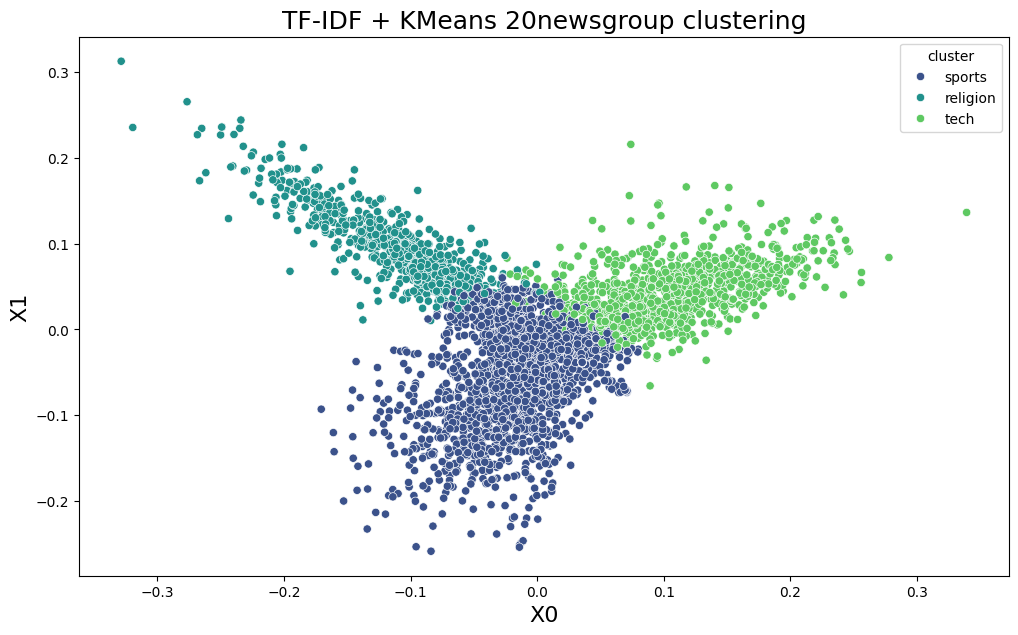

In [14]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()